In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Hero Commandos,1979
1,J-ok'el,2007
2,The Greening of Whitney Brown,2011
3,After Hours Happy Hour,1999
4,Lang tzu yi chao,1978


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

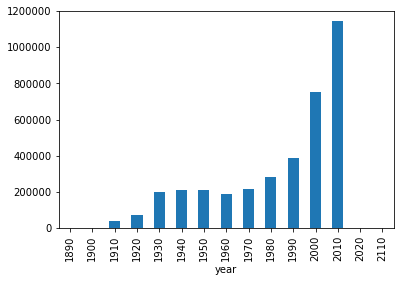

In [10]:
cast.groupby(cast.year//10*10).size().plot(kind='bar')


### Use groupby() to plot the number of "Hamlet" films made each decade.

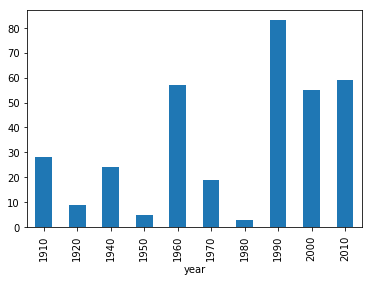

In [11]:
c = cast
c=c[c.title == 'Hamlet']
c.groupby(c.year//10*10).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

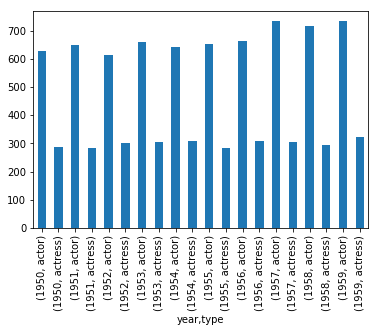

In [18]:
c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.groupby(['year', 'type']).size().plot(kind='bar')

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

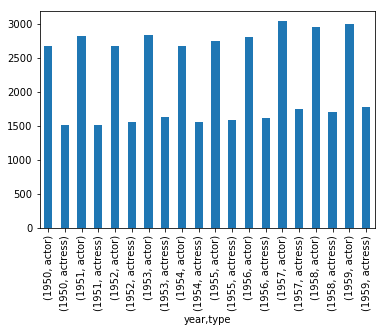

In [20]:
c = cast
c = c[c.year // 10 *10== 1950]
c = c[c.n <= 5]
c.groupby(['year', 'type']).size().plot(kind='bar')

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


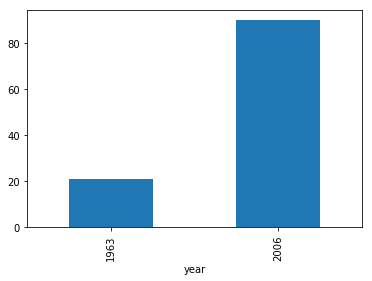

In [33]:
c = cast
c = c[c.title == 'The Pink Panther']
c.sort('n').groupby(['year']).size().plot(kind='bar')

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [42]:
c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['year', 'title']).size()
g[g > 1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [45]:
c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['year', 'title']).size()
g[g > 1].sort_values()

year  title                               
1981  An American Werewolf in London          2
1982  The Dark Crystal                        2
1985  Follow That Bird                        3
1999  The Adventures of Elmo in Grouchland    3
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
1981  The Great Muppet Caper                  6
1984  The Muppets Take Manhattan              7
1992  The Muppet Christmas Carol              7
1979  The Muppet Movie                        8
dtype: int64

In [46]:
c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['year', 'title']).size()
g[g > 1].order()

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: order is deprecated, use sort_values(...)


year  title                               
1981  An American Werewolf in London          2
1982  The Dark Crystal                        2
1985  Follow That Bird                        3
1999  The Adventures of Elmo in Grouchland    3
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
1981  The Great Muppet Caper                  6
1984  The Muppets Take Manhattan              7
1992  The Muppet Christmas Carol              7
1979  The Muppet Movie                        8
dtype: int64